<h1 style="color:#f0b904">Ex 3: Entanglement</h1>
<p>In Quantum mechanics a group of particules (Qbits in our case) is said to be Entangled if they are linked such that the colapse of one particules will collapse all of them, this is the exact phenomenon that makes Quantum-Computing somewhat useful</p>

<p>In this exercise we have to Entangle 2 Qbits and measure their <i>bell-state</i></p>

In [1]:
import qiskit
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

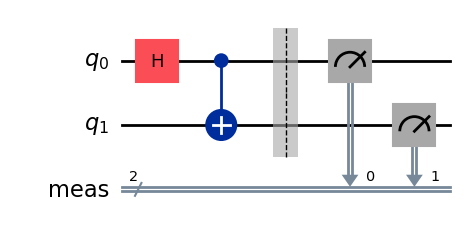

In [2]:
qc = QuantumCircuit(2, 0)

qc.h(0)
qc.cx(0, 1) # Apply CNOT to qbits 1 with 0 as control, meaning if q0 = 1, flip q1
qc.measure_all()
qc.draw(output="mpl")

In [3]:
saer = AerSimulator()
shot_count = 500

qc_aer = qiskit.transpile(qc, backend=saer)
result = saer.run(qc_aer, shots=shot_count).result()
counts = result.get_counts()

print(counts)
print(result)

{'11': 268, '00': 232}
Result(backend_name='aer_simulator', backend_version='0.15.0', qobj_id='', job_id='2182c3e2-6794-432f-8aab-c2ee86adf991', success=True, results=[ExperimentResult(shots=500, success=True, meas_level=2, data=ExperimentResultData(counts={'0x3': 268, '0x0': 232}), header=QobjExperimentHeader(creg_sizes=[['meas', 2]], global_phase=0.0, memory_slots=2, n_qubits=2, name='circuit-166', qreg_sizes=[['q', 2]], metadata={}), status=DONE, seed_simulator=1811548690, metadata={'time_taken': 0.001310965, 'num_bind_params': 1, 'parallel_state_update': 8, 'parallel_shots': 1, 'required_memory_mb': 0, 'input_qubit_map': [[1, 1], [0, 0]], 'method': 'stabilizer', 'device': 'CPU', 'num_qubits': 2, 'sample_measure_time': 0.000208129, 'active_input_qubits': [0, 1], 'num_clbits': 2, 'remapped_qubits': False, 'runtime_parameter_bind': False, 'max_memory_mb': 15678, 'noise': 'ideal', 'measure_sampling': True, 'batched_shots_optimization': False, 'fusion': {'enabled': False}}, time_taken=0

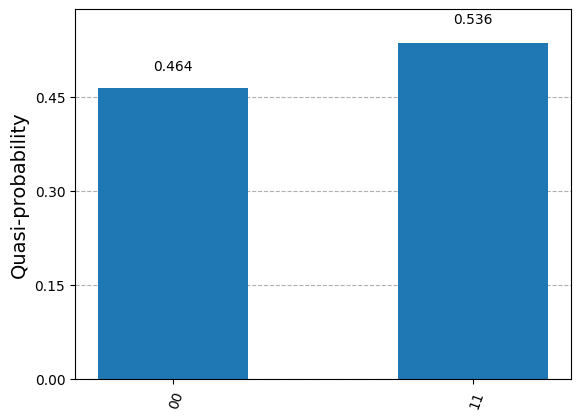

In [4]:
for key in counts:
    counts[key] = counts[key] / shot_count
plot_histogram(counts)


We here have a 2 circuit Qbits, first we put q0 in a superposition state using an H-gate as before.<br>
And now we want to entangle the q1 with q0, for this we use a CX (CNOT) gate, which will effectively entangle them.<br>
Now each measurment will collapse both state at the same time.